# KNN on Credit Card Fraud Detection Dataset

__Task 1.__ Propose a suitable error metrics for this problem.

__Task 2.__ Apply KNN on the dataset, find out the best k using grid search.

__Task 3.__ Report the value of performance

__Info about data: it is a CSV file, contains 31 features, the last feature is used to classify the transaction whether it is a fraud or not__

__Information about data set__

The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

The dataset has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group (http://mlg.ulb.ac.be) of ULB (Université Libre de Bruxelles) on big data mining and fraud detection.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [4]:
data = pd.read_csv("creditcard.csv")

In [5]:
data.shape

(284807, 31)

In [6]:
data.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0


In [7]:
data["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [8]:
#taking first 20000 samples

data_20000 = data[:20000]

In [10]:
data_20000.shape

(20000, 31)

In [11]:
data_20000["Class"].value_counts()

0    19915
1       85
Name: Class, dtype: int64

__Our dataset is heaviky imbalanced__

In [12]:
data20000 = data_20000.drop(['Class'], axis=1)
data20000.shape

(20000, 30)

In [14]:
data20000_labels = data_20000["Class"]
data20000_labels.shape

(20000,)

In [16]:
data20000_Std = StandardScaler().fit_transform(data20000)
print(data20000_Std.shape)
print(type(data20000_Std))

(20000, 30)
<class 'numpy.ndarray'>


__Task1: Propose a suitable error metrics for this problem.__

Since our dataset is heavily imbalanced therefore I am proposing "Recall" as a suitable error metric for our problem

__Task 2: Apply KNN on the dataset, find out the best k using 5-Folds CV.__

In [19]:
X1 = data20000_Std[0:16000]
XTest = data20000_Std[16000:20000]
Y1 = data20000_labels[0:16000]
YTest = data20000_labels[16000:20000]
#taking last 4k points as test data and first 16k points as train data

myList = list(range(0,50))
neighbors = list(filter(lambda x: x%2!=0, myList))  #This will give a list of odd numbers only ranging from 0 to 50

CV_Scores = []

for k in neighbors:
    KNN = KNeighborsClassifier(n_neighbors = k, algorithm = 'kd_tree')
    scores = cross_val_score(KNN, X1, Y1, cv = 5, scoring='recall')
    CV_Scores.append(scores.mean())

In [20]:
CV_Scores

[0.7952380952380952,
 0.659047619047619,
 0.5466666666666666,
 0.5180952380952382,
 0.5038095238095238,
 0.4780952380952381,
 0.4780952380952381,
 0.4923809523809524,
 0.46571428571428564,
 0.4390476190476191,
 0.41238095238095235,
 0.39904761904761904,
 0.5580952380952381,
 0.518095238095238,
 0.5047619047619047,
 0.4514285714285714,
 0.41142857142857137,
 0.41142857142857137,
 0.3980952380952381,
 0.3980952380952381,
 0.3980952380952381,
 0.4247619047619048,
 0.5314285714285715,
 0.5314285714285715,
 0.5180952380952382]

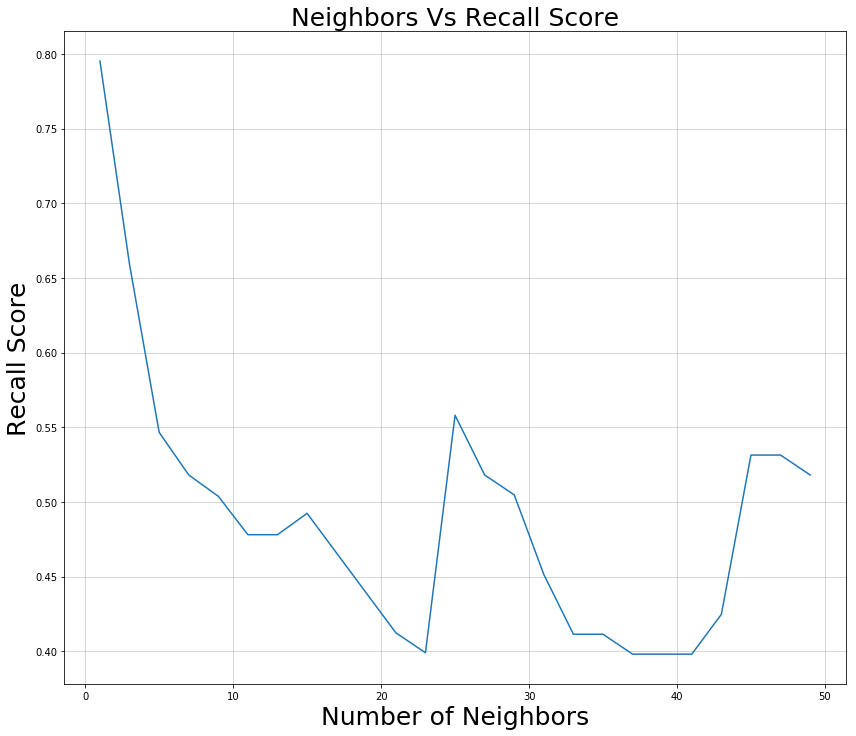

In [21]:
plt.figure(figsize = (14, 12))
plt.plot(neighbors, CV_Scores)
plt.title("Neighbors Vs Recall Score", fontsize=25)
plt.xlabel("Number of Neighbors", fontsize=25)
plt.ylabel("Recall Score", fontsize=25)
plt.grid(linestyle='-', linewidth=0.5)

In [22]:
best_k = neighbors[CV_Scores.index(max(CV_Scores))]
best_k

1

__Best 'K' value is chosen as 1__

In [23]:
from sklearn.metrics import recall_score

KNN_best = KNeighborsClassifier(n_neighbors = best_k, algorithm = 'kd_tree')

KNN_best.fit(X1, Y1)

prediction = KNN_best.predict(XTest)

recallTest = recall_score(YTest, prediction)

print("Recall Score of the knn classifier for best k values of "+str(best_k)+" is: "+str(recallTest))

cm = confusion_matrix(YTest, prediction)

print(cm)

tn, fp, fn, tp = cm.ravel()

(tn, fp, fn, tp)

Recall Score of the knn classifier for best k values of 1 is: 0.8333333333333334
[[3978   10]
 [   2   10]]


(3978, 10, 2, 10)

In [24]:
YTest.value_counts()

0    3988
1      12
Name: Class, dtype: int64

There are total 4000 points in our test dataset, out of which 3988 points belongs to class label '0' and 12 points belong to class label '1'. Now from confusion matrix we can see that the value of "True Negative" is 3978 which means that out of 3988 points which belong to class '0', 3978 points are predicted as '0'. Furthermore, from the same confusion matrix we can see that the value of "True Positive" is 10 which means that out of 12 points which belong to class '1', 10 points are detected as '1'. 10 point from class '0' and 2 points from class '1' are detected falsely

In conclusion, despite being an imbalanced dataset, our model is performing well. Even thought, there are only 12 points out of 4000 belongs to class '1', still our model is able to detect 10 of them correctly.



__Task 3: Report the value of performance__

In [25]:
# Calculating R square value of our model
from sklearn.metrics import r2_score

print("Recall Score of the knn classifier for best k values of "+str(best_k)+" is: "+str(recallTest))


Recall Score of the knn classifier for best k values of 1 is: 0.8333333333333334


__Linear Algebra (Credit card fraud detection)__

Info about data: it is a CSV file, contains 31 features, the last feature is used to classify the transaction whether it is a fraud or not

__Task 1: please do proper analysis of the whole data, plot all relevant plots, note down all observations.__

__Task 2: Let's define a matric__

similarity(i,j) = dot product (vi, vj) / length(vi) * length(vj) Take out any sample from the data set which contains no less than 100 transactions, for every transaction in the sample find out top 10 transactions in the dataset which have the highest similarity(i,j).

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

url = "creditcard.csv"

creditcard = pd.read_csv(url)

creditcard

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [27]:
print(creditcard.shape)

(284807, 31)


In [28]:
print(creditcard.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [29]:
creditcard["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

__2-D Scatter Plot__

/apps/anaconda2/envs/jupyter-py3/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


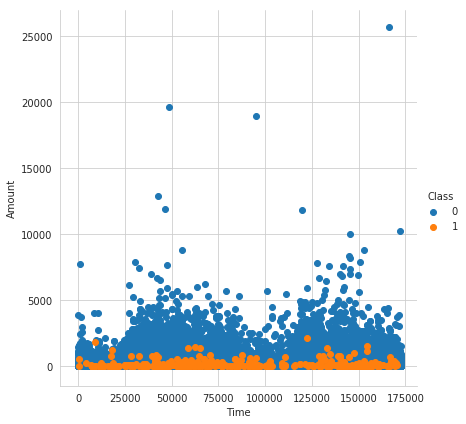

In [30]:
sns.set_style("whitegrid")
sns.FacetGrid(creditcard, hue="Class", size = 6).map(plt.scatter, "Time", "Amount").add_legend()
plt.show()

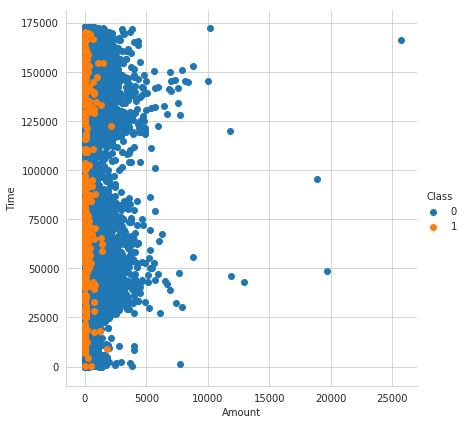

In [31]:
sns.set_style("whitegrid")
sns.FacetGrid(creditcard, hue="Class", size = 6).map(plt.scatter, "Amount", "Time").add_legend()
plt.show()

__Observations:__
1. From the above two plots it is clearly visible that thre are frauds only on the transactions which have transactions which have transaction amount approximately less than 2500. Transactions which have transaction amount approximately anbove 2500 have no fraud.

2. As per with the time, the frauds in the transactions are evenly distributed throughout time.

__3D Scatter plot__

In [32]:
FilteredData = creditcard[['Time','Amount', 'Class']]

In [33]:
FilteredData

,Time,Amount,Class
0,0.0,149.62,0
1,0.0,2.69,0
2,1.0,378.66,0
3,1.0,123.50,0
4,2.0,69.99,0
5,2.0,3.67,0
6,4.0,4.99,0
7,7.0,40.80,0
8,7.0,93.20,0
9,9.0,3.68,0


In [34]:
print(FilteredData.shape)

(284807, 3)


In [35]:
print(FilteredData.shape)

(284807, 3)


In [36]:
FilteredData["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

/apps/anaconda2/envs/jupyter-py3/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/apps/anaconda2/envs/jupyter-py3/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/apps/anaconda2/envs/jupyter-py3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/apps/anaconda2/envs/jupyter-py3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in doub

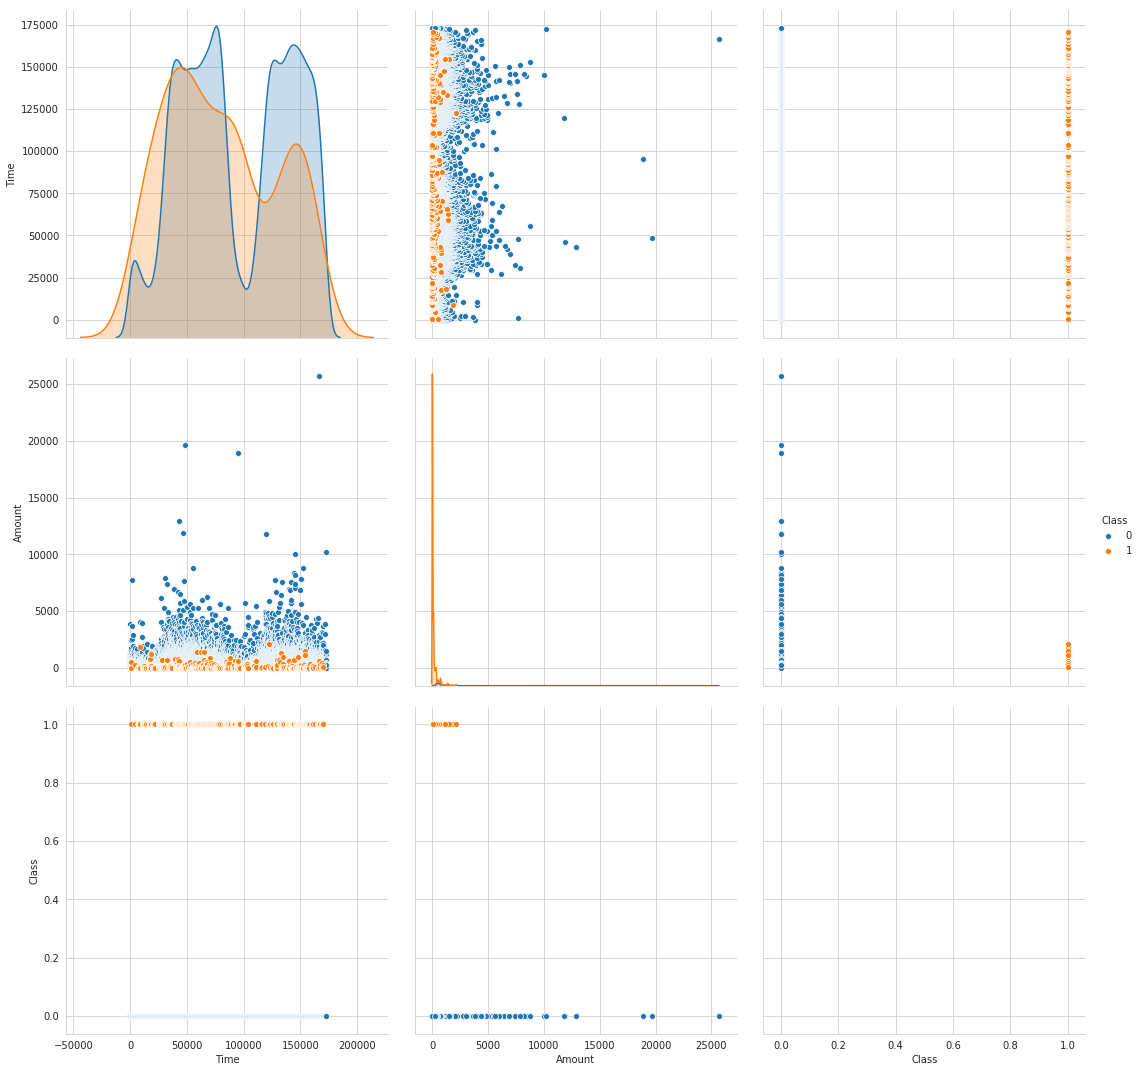

In [37]:

plt.close();
sns.set_style("whitegrid");
sns.pairplot(FilteredData, hue="Class", size=5);
plt.show()

In [38]:
countLess = 0 
countMore = 0 
for i in range(284806):
    if(FilteredData.iloc[i]["Amount"] < 2500):
        countLess = countLess + 1
    else:
        countMore = countMore + 1
print(countLess)
print(countMore)
        

284357
449


In [39]:
percentage = (countLess/284807)*100
percentage

99.84199826549207

__Observations:__

Now it has been calculated that there are 284357 transasctions which has a transaction amount less than 2500. Means 99.84% of transactions have transaction amount less then 2500.

In [40]:
class0 = 0 
class1 = 0
for i in range(284806):
    if(FilteredData.iloc[i]["Amount"] <2500):
        if(FilteredData.iloc[i]["Class"]==0):
            class0 = class0 + 1
        else:
            class1 = class1 + 1
            
print(class0)
print(class1)

283865
492


In [41]:
FilteredData["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

__Observations:__

Now the total number of fraud transactions in whole data are 492. It has been calculated that total number of fraud transactions in data where transaction amount is less than 2500 is also 492.
Therefore, all 100% fraud transactions have transaction amount less than 2500 and there is no fraud transaction where transaction amount is more than 2500.

__Histogram, PDF and CDF__

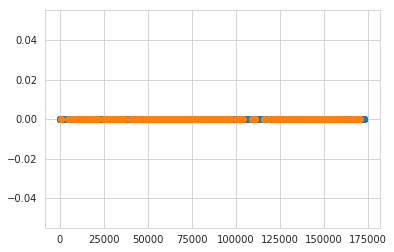

In [42]:
creditCard_genuine = FilteredData.loc[FilteredData["Class"] == 0]
creditCard_fraud = FilteredData.loc[FilteredData["Class"] == 1]

plt.plot(creditCard_genuine["Time"], np.zeros_like(creditCard_genuine["Time"]), "o")
plt.plot(creditCard_fraud["Time"], np.zeros_like(creditCard_fraud["Time"]), "o")

plt.show()

#X-axis: Time

__Observations:__

Fraud and genuine transactions are spread evenly thought time and there is no clear distribution.


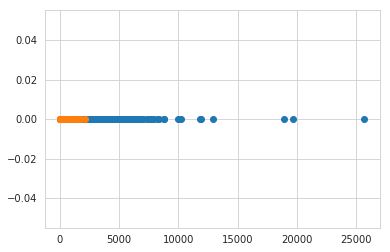

In [43]:
plt.plot(creditCard_genuine["Amount"], np.zeros_like(creditCard_genuine["Amount"]), "o")
plt.plot(creditCard_fraud["Amount"], np.zeros_like(creditCard_fraud["Amount"]), "o")

plt.show()
#X-axis: Amount

__Observations:__

It can clearly be observed from this 1D scatter plot that the fraud transactions are there only on the transaction amount less than 2500.

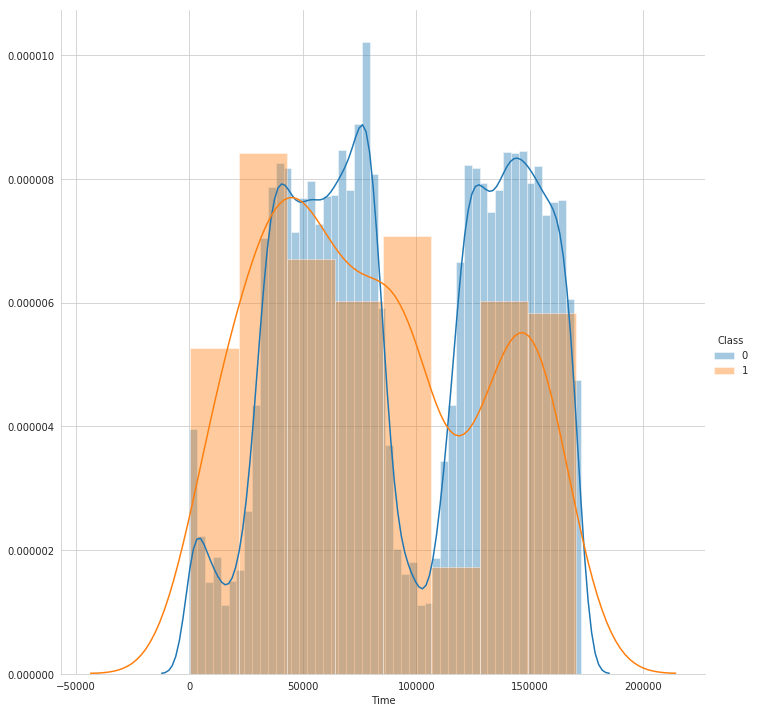

In [44]:
sns.FacetGrid(FilteredData, hue="Class", size=10).map(sns.distplot, "Time").add_legend()
plt.show()

__Observations:__

There is a heavy overlap of genuine and fraud transactions throughout the time and there is no clear distinction.

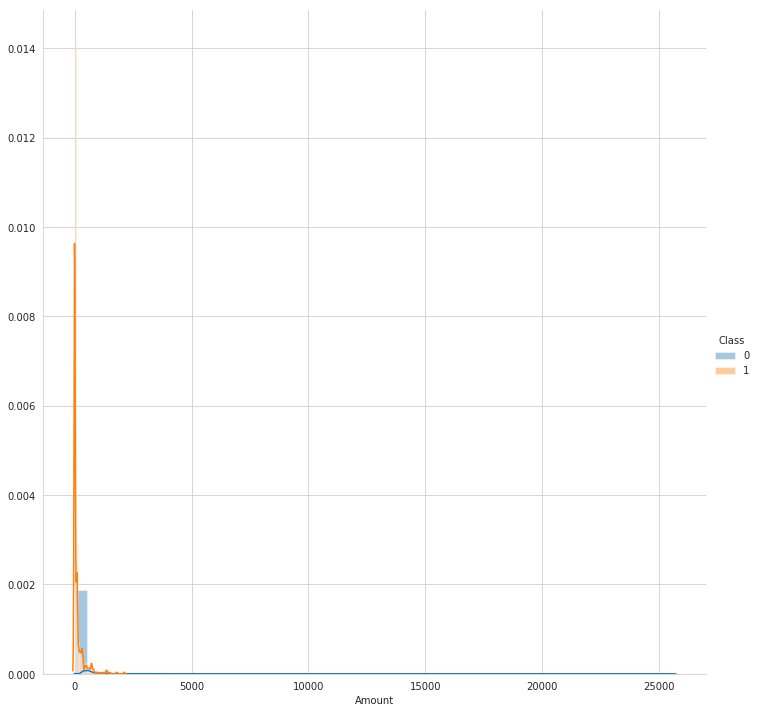

In [45]:
sns.FacetGrid(FilteredData, hue="Class", size=10).map(sns.distplot, "Amount").add_legend()
plt.show()

__Observations:__

Most of the transaction have amount less than 2500 approximately and all of the fraud transactions have transaction amount less than 2500. There is no fraud transaction of transaction amount greater than 2500.

__Hence, the best histogram that here__

pdf =  [9.98553406e-01 1.26401388e-03 1.26401388e-04 3.51114966e-05
 7.02229931e-06 3.51114966e-06 0.00000000e+00 7.02229931e-06
 0.00000000e+00 3.51114966e-06]


Counts = [3.88675874e-04 4.92003427e-07 4.92003427e-08 1.36667619e-08
 2.73335237e-09 1.36667619e-09 0.00000000e+00 2.73335237e-09
 0.00000000e+00 1.36667619e-09]


Bin edges =  [    0.     2569.116  5138.232  7707.348 10276.464 12845.58  15414.696
 17983.812 20552.928 23122.044 25691.16 ]


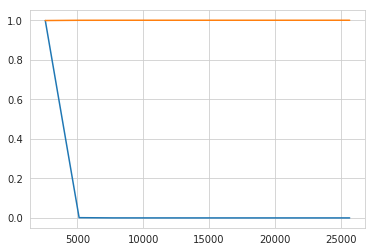

In [46]:
counts, bin_edges = np.histogram(FilteredData['Amount'], bins=10, density = True)
pdf = counts/(sum(counts))

print("pdf = ",pdf)
print("\n")
print("Counts =",counts)
print("\n")
print("Bin edges = ",bin_edges)

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)



plt.show();

__Observations:__

Probability of the points having transaction amount approximately less than 2500 is 1, it means almost all of the transactions have transaction amount less than 2500 and cdf curve verifies this fact.

# Mean, Variance and Std-dev

In [47]:
print("Means:")
print("Mean of transaction amount of genuine transactions: ",np.mean(creditCard_genuine["Amount"]))
print("Mean of transaction amount of fraud transactions: ",np.mean(creditCard_fraud["Amount"]))

Means:
Mean of transaction amount of genuine transactions:  88.29102242225574
Mean of transaction amount of fraud transactions:  122.21132113821133


In [48]:
print("Standard Deviation:")
print("Std-Deviation of transaction amount of genuine transactions: ", np.std(creditCard_genuine["Amount"]))
print("Std-Deviation of transaction amount of fraud transactions: ", np.std(creditCard_fraud["Amount"]))

Standard Deviation:
Std-Deviation of transaction amount of genuine transactions:  250.1046523874637
Std-Deviation of transaction amount of fraud transactions:  256.42229861324483


In [49]:
print("Median:")
print("Median of transaction amount of genuine transactions: ", np.median(creditCard_genuine["Amount"]))
print("Median of transaction amount of fraud transactions: ", np.median(creditCard_fraud["Amount"]))

Median:
Median of transaction amount of genuine transactions:  22.0
Median of transaction amount of fraud transactions:  9.25


In [50]:
print("\nQuantiles:")
print(np.percentile(creditCard_genuine["Amount"],np.arange(0, 100, 25)))
print(np.percentile(creditCard_fraud["Amount"],np.arange(0, 100, 25)))


Quantiles:
[ 0.    5.65 22.   77.05]
[  0.     1.     9.25 105.89]


# Box plot and Whiskers

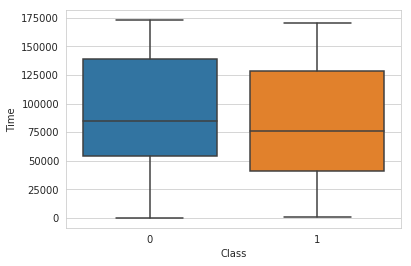

In [51]:
sns.boxplot(x = "Class", y = "Time", data = creditcard)
plt.show()

__Observations:__

By looking at the above box plot that can say that both fraud & genuine transactions occur throughout time and there is no distinction between them.

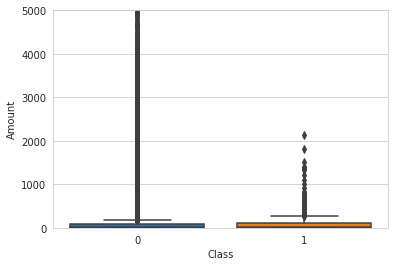

In [52]:
sns.boxplot(x = "Class",  y = "Amount", data = creditcard)
plt.ylim(0, 5000)
plt.show()

__Observations:__

From above box plot that can easily infer that there are no fraud transactions occur above the transaction amount of 3000. All of the fraud transactions have transaction amount less than 3000. However, there are many transactions which have a transaction amount greater than 3000 and all of them are genuine.

# Similarity

In [53]:
from scipy import spatial

In [54]:

#Sample the data from original data so as to save the computation time.
sampleData = creditcard.head(20000) 

In [55]:
# Taking sample of size 100 from index 30401 to 30500
samples = creditcard.loc[30401:30500]

In [56]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [57]:
frame = []

In [ ]:
for i in range(30401, 30501):
    t1 = samples.loc[i]
    c = samples.loc[i]["Class"]
    for j in range(20000):
        t2 = sampleData.loc[j]
        classLabel = creditcard.loc[j]["Class"]
        similarity = 1 - spatial.distance.cosine(t1, t2)
        frame.append([classLabel, similarity, j])
        
    df = pd.DataFrame(frame, columns=['Class', 'Similarity', 'Transaction ID'])
    df_sorted = df.sort_values("Similarity", ascending=False)
    print("Top 10 transactions having highest similarity with transaction ID = "+str(i)+" and class = "+str(c)+":")
    print(df_sorted.iloc[:10])
    print("\n")
    frame = []

# Remove Outliers Credit Card

In [59]:
data.shape

(284807, 31)

In [60]:
# Sampling random 50000 points
data_50000 = data.sample(n=50000)

In [61]:
data_50000.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
163507,115988.0,2.201213,-0.673377,-1.139573,-0.529548,-0.410475,-0.435953,-0.525839,-0.189486,-0.337207,...,-0.416501,-0.577232,0.288499,0.479817,-0.240983,0.539670,-0.044063,-0.052146,1.00,0
266393,162311.0,1.912730,-0.218777,-0.223445,1.194501,-0.288482,0.426510,-0.708360,0.215106,0.763388,...,0.314540,1.130885,0.112158,0.723913,-0.002322,-0.523037,0.064234,-0.034473,1.00,0
202298,134258.0,-0.797081,1.137040,-0.518215,-1.167037,0.474641,-1.532493,0.933240,0.178602,0.055330,...,0.257382,0.523238,-0.290599,-0.239535,0.536694,-0.287907,-0.253006,-0.055992,27.99,0
119417,75438.0,0.734627,1.708363,-1.670648,1.702873,1.066712,-1.568533,0.959534,-0.221751,-0.520149,...,-0.085606,0.086498,0.145510,0.079646,-0.543580,-0.394938,0.279811,0.016984,3.75,0
105338,69475.0,1.258387,0.201964,0.497359,0.626886,-0.535349,-1.005230,0.020546,-0.170003,0.140080,...,-0.264378,-0.796974,0.142682,0.357627,0.196494,0.096865,-0.033327,0.017787,2.69,0


In [62]:
data_50000.to_csv("NewCreditCard.csv")

__Detecting outliers for 'k' value 2__

__That have assumed that 50% of total points in our data set are outliers.__

In [63]:
newData = pd.read_csv("NewCreditCard.csv")

In [64]:
newData.head(2)

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,163507,115988.0,2.201213,-0.673377,-1.139573,-0.529548,-0.410475,-0.435953,-0.525839,-0.189486,...,-0.416501,-0.577232,0.288499,0.479817,-0.240983,0.539670,-0.044063,-0.052146,1.0,0
1,266393,162311.0,1.912730,-0.218777,-0.223445,1.194501,-0.288482,0.426510,-0.708360,0.215106,...,0.314540,1.130885,0.112158,0.723913,-0.002322,-0.523037,0.064234,-0.034473,1.0,0


In [65]:
FinalData = newData.drop("Unnamed: 0", axis = 1)

In [66]:
FinalData.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,115988.0,2.201213,-0.673377,-1.139573,-0.529548,-0.410475,-0.435953,-0.525839,-0.189486,-0.337207,...,-0.416501,-0.577232,0.288499,0.479817,-0.240983,0.539670,-0.044063,-0.052146,1.00,0
1,162311.0,1.912730,-0.218777,-0.223445,1.194501,-0.288482,0.426510,-0.708360,0.215106,0.763388,...,0.314540,1.130885,0.112158,0.723913,-0.002322,-0.523037,0.064234,-0.034473,1.00,0
2,134258.0,-0.797081,1.137040,-0.518215,-1.167037,0.474641,-1.532493,0.933240,0.178602,0.055330,...,0.257382,0.523238,-0.290599,-0.239535,0.536694,-0.287907,-0.253006,-0.055992,27.99,0
3,75438.0,0.734627,1.708363,-1.670648,1.702873,1.066712,-1.568533,0.959534,-0.221751,-0.520149,...,-0.085606,0.086498,0.145510,0.079646,-0.543580,-0.394938,0.279811,0.016984,3.75,0
4,69475.0,1.258387,0.201964,0.497359,0.626886,-0.535349,-1.005230,0.020546,-0.170003,0.140080,...,-0.264378,-0.796974,0.142682,0.357627,0.196494,0.096865,-0.033327,0.017787,2.69,0


In [67]:
FinalData.shape

(50000, 31)

In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=2, algorithm='auto', metric='minkowski', p=2, metric_params=None, contamination=0.5, n_jobs=1)

outlierArray = lof.fit_predict(FinalData)

outlierArray

array([ 1,  1, -1, ..., -1, -1, -1])

__Here, this got an array, where row corresponding to array element 1 in our datasets in an inlier and row corresponding to array elements to -1 in our datasets is an outlier__


In [72]:

len(outlierArray)

50000

__Calculating total number of outlier and inliers__

In [75]:
countOutliers = 0
countInliers = 0
for i in range(50000):
    if outlierArray[i] == -1:
       countOutliers += 1
    else:
        countInliers +=1
print("Total number of outliers = "+str(countOutliers))
print("Total number of inliers = "+str(countInliers))


Total number of outliers = 25000
Total number of inliers = 25000


In [76]:
FinalData2 = FinalData.copy()

In [77]:
FinalData2.shape

(50000, 31)

__Removing OutLiers__

In [84]:

FinalData.shape       

(25000, 31)

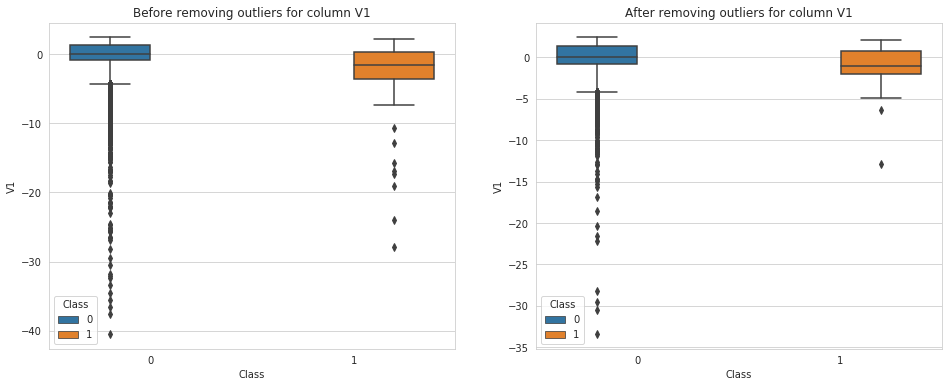

In [85]:
fig = plt.figure(figsize = (16,6))

plt.subplot(1, 2, 1)
plt.title("Before removing outliers for column V1")
ax = sns.boxplot(x="Class", y = "V1", data= FinalData2, hue = "Class")

plt.subplot(1, 2, 2)
plt.title("After removing outliers for column V1")
ax = sns.boxplot(x="Class", y = "V1", data= FinalData, hue = "Class")

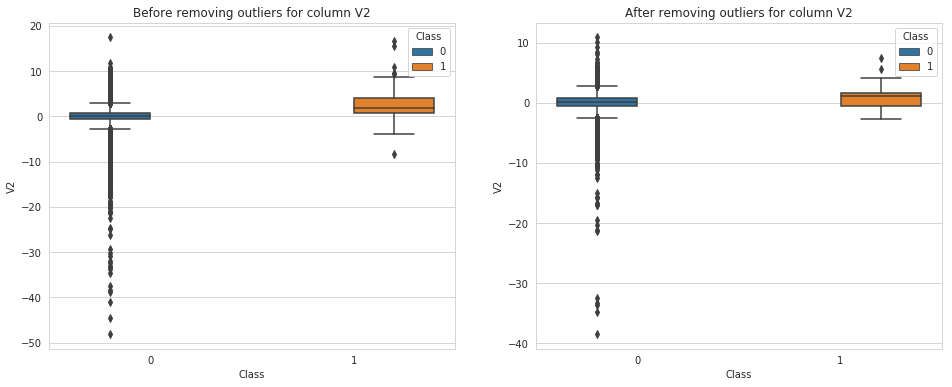

In [86]:
fig = plt.figure(figsize = (16,6))

plt.subplot(1, 2, 1)
plt.title("Before removing outliers for column V2")
ax = sns.boxplot(x="Class", y = "V2", data= FinalData2, hue = "Class")

plt.subplot(1, 2, 2)
plt.title("After removing outliers for column V2")
ax = sns.boxplot(x="Class", y = "V2", data= FinalData, hue = "Class")

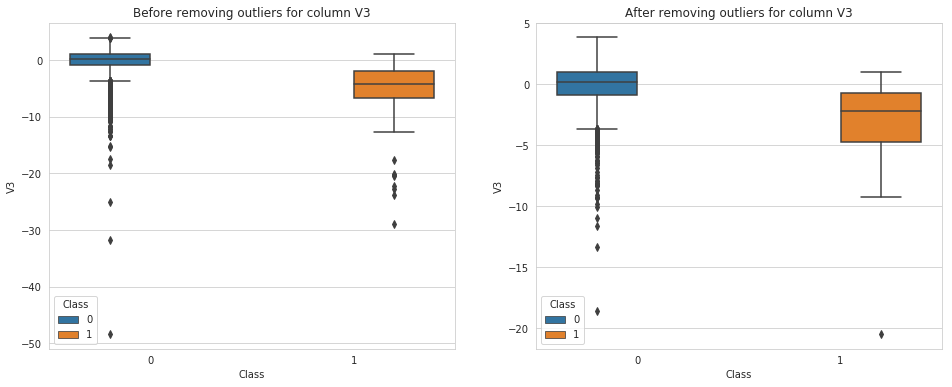

In [87]:
fig = plt.figure(figsize = (16,6))

plt.subplot(1, 2, 1)
plt.title("Before removing outliers for column V3")
ax = sns.boxplot(x="Class", y = "V3", data= FinalData2, hue = "Class")

plt.subplot(1, 2, 2)
plt.title("After removing outliers for column V3")
ax = sns.boxplot(x="Class", y = "V3", data= FinalData, hue = "Class")

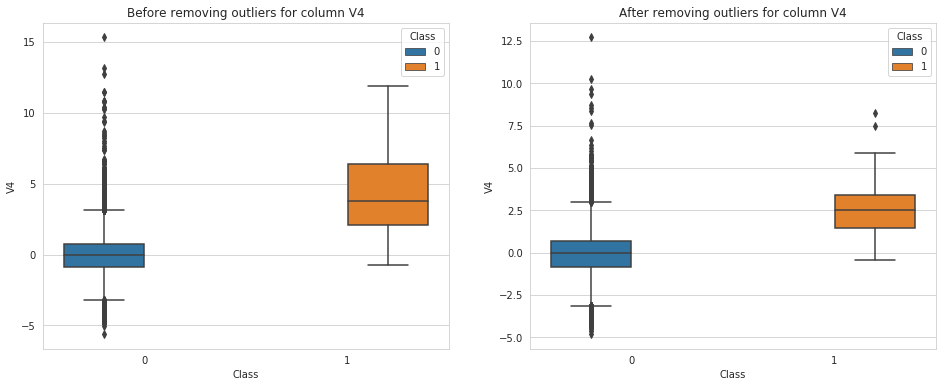

In [88]:
fig = plt.figure(figsize = (16,6))

plt.subplot(1, 2, 1)
plt.title("Before removing outliers for column V4")
ax = sns.boxplot(x="Class", y = "V4", data= FinalData2, hue = "Class")

plt.subplot(1, 2, 2)
plt.title("After removing outliers for column V4")
ax = sns.boxplot(x="Class", y = "V4", data= FinalData, hue = "Class")

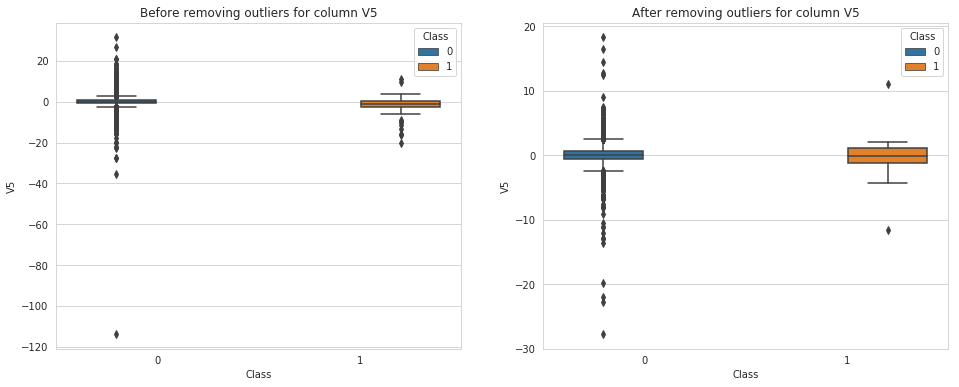

In [89]:
fig = plt.figure(figsize = (16,6))

plt.subplot(1, 2, 1)
plt.title("Before removing outliers for column V5")
ax = sns.boxplot(x="Class", y = "V5", data= FinalData2, hue = "Class")

plt.subplot(1, 2, 2)
plt.title("After removing outliers for column V5")
ax = sns.boxplot(x="Class", y = "V5", data= FinalData, hue = "Class")

It can easily be observed in all of the above boxplots corresponding to columns V1, V2, V3, V4, V5, that most of the outliers for points belongs to class 1 has been removed. Furthermore, many of the outliers for points belong to class 0 has also been removed. For example for class 0 in plot 1 for column V1 all of the outliers less than -35 have been removed. Similarly, for class 0 in plot 3 for column V3 all the outliers less than -18 have been removed. Similarly, for class 0 in plot 5 for column V5 all of the outliers greater than 15 have been removed.

__Detecting outliers for 'k' value 3__

__Have assumed that 50% of total points in our data set are outliers.__

In [91]:
newData = pd.read_csv("NewCreditCard.csv")

newData.head()

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,163507,115988.0,2.201213,-0.673377,-1.139573,-0.529548,-0.410475,-0.435953,-0.525839,-0.189486,...,-0.416501,-0.577232,0.288499,0.479817,-0.240983,0.539670,-0.044063,-0.052146,1.00,0
1,266393,162311.0,1.912730,-0.218777,-0.223445,1.194501,-0.288482,0.426510,-0.708360,0.215106,...,0.314540,1.130885,0.112158,0.723913,-0.002322,-0.523037,0.064234,-0.034473,1.00,0
2,202298,134258.0,-0.797081,1.137040,-0.518215,-1.167037,0.474641,-1.532493,0.933240,0.178602,...,0.257382,0.523238,-0.290599,-0.239535,0.536694,-0.287907,-0.253006,-0.055992,27.99,0
3,119417,75438.0,0.734627,1.708363,-1.670648,1.702873,1.066712,-1.568533,0.959534,-0.221751,...,-0.085606,0.086498,0.145510,0.079646,-0.543580,-0.394938,0.279811,0.016984,3.75,0
4,105338,69475.0,1.258387,0.201964,0.497359,0.626886,-0.535349,-1.005230,0.020546,-0.170003,...,-0.264378,-0.796974,0.142682,0.357627,0.196494,0.096865,-0.033327,0.017787,2.69,0


In [92]:
FinalData = newData.drop("Unnamed: 0", axis = 1)

FinalData.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,115988.0,2.201213,-0.673377,-1.139573,-0.529548,-0.410475,-0.435953,-0.525839,-0.189486,-0.337207,...,-0.416501,-0.577232,0.288499,0.479817,-0.240983,0.539670,-0.044063,-0.052146,1.00,0
1,162311.0,1.912730,-0.218777,-0.223445,1.194501,-0.288482,0.426510,-0.708360,0.215106,0.763388,...,0.314540,1.130885,0.112158,0.723913,-0.002322,-0.523037,0.064234,-0.034473,1.00,0
2,134258.0,-0.797081,1.137040,-0.518215,-1.167037,0.474641,-1.532493,0.933240,0.178602,0.055330,...,0.257382,0.523238,-0.290599,-0.239535,0.536694,-0.287907,-0.253006,-0.055992,27.99,0
3,75438.0,0.734627,1.708363,-1.670648,1.702873,1.066712,-1.568533,0.959534,-0.221751,-0.520149,...,-0.085606,0.086498,0.145510,0.079646,-0.543580,-0.394938,0.279811,0.016984,3.75,0
4,69475.0,1.258387,0.201964,0.497359,0.626886,-0.535349,-1.005230,0.020546,-0.170003,0.140080,...,-0.264378,-0.796974,0.142682,0.357627,0.196494,0.096865,-0.033327,0.017787,2.69,0


In [93]:
FinalData.shape

(50000, 31)

In [94]:
lof = LocalOutlierFactor(n_neighbors=3, algorithm='auto', metric='minkowski', p=2, metric_params=None, contamination=0.5, n_jobs=1)

outlierArray = lof.fit_predict(FinalData)

outlierArray

array([ 1, -1, -1, ..., -1,  1, -1])

__Here, we got an array, where row corresponding to array element 1 in our dataset is an inlier and row corresponding to array element to -1 in our dataset is an oulier__

In [95]:

len(outlierArray)

50000

__Calculating total number of outlier and inliers__

In [97]:
countOutliers = 0
countInliers = 0
for i in range(50000):
    if outlierArray[i] == -1:
        countOutliers += 1
    else:
        countInliers += 1
print("Total number of outliers = "+str(countOutliers))
print("Total number of inliers = "+str(countInliers))

Total number of outliers = 25000
Total number of inliers = 25000


In [98]:
FinalData2 = FinalData.copy()

In [99]:
FinalData2.shape

(50000, 31)

__Removing Outliers__

In [100]:
for i in range(50000):
    if outlierArray[i] == -1:
        FinalData.drop(i, inplace = True)
FinalData.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,115988.0,2.201213,-0.673377,-1.139573,-0.529548,-0.410475,-0.435953,-0.525839,-0.189486,-0.337207,...,-0.416501,-0.577232,0.288499,0.479817,-0.240983,0.539670,-0.044063,-0.052146,1.00,0
6,141981.0,-0.173377,0.739658,-0.466552,-1.286818,2.215592,-1.173858,2.020604,-0.998285,-0.328409,...,0.089673,0.712207,-0.655435,-0.909438,0.227767,0.155201,-0.327676,-0.326322,7.59,0
8,50780.0,-1.254622,0.042868,1.484420,0.491900,1.314141,5.301725,-0.435132,1.037240,1.195378,...,-0.213886,0.217339,-0.154193,1.059244,0.587946,-0.056790,-0.003680,-0.131552,100.69,0
9,79227.0,1.231766,0.191406,-0.075770,0.329423,0.243568,0.203561,-0.152867,0.170753,-0.082890,...,-0.272263,-0.810245,0.046805,-0.902881,0.209150,0.162383,-0.015274,0.007106,1.29,0
10,54467.0,1.335053,0.331464,-2.057763,-0.346175,2.583234,2.854102,-0.187547,0.685154,-0.286614,...,-0.191820,-0.650118,-0.114069,0.915936,0.730073,0.383879,-0.031902,0.029849,0.76,0


In [101]:
FinalData2.shape

(50000, 31)

In [102]:
FinalData.shape

(25000, 31)

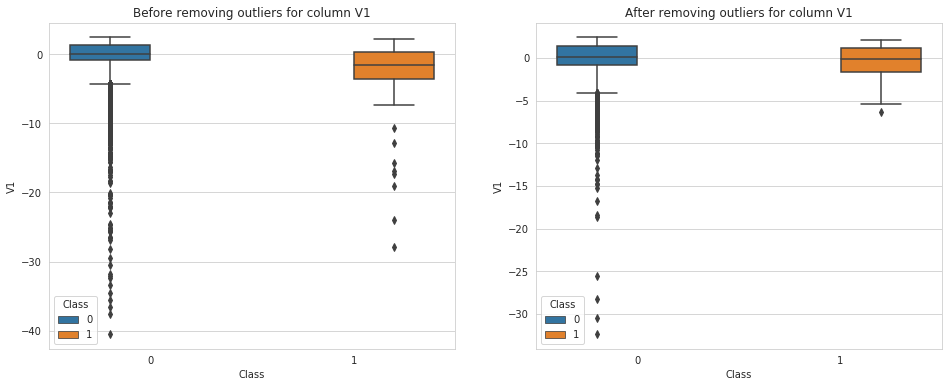

In [103]:
fig = plt.figure(figsize = (16,6))

plt.subplot(1, 2, 1)
plt.title("Before removing outliers for column V1")
ax = sns.boxplot(x="Class", y = "V1", data= FinalData2, hue = "Class")

plt.subplot(1, 2, 2)
plt.title("After removing outliers for column V1")
ax = sns.boxplot(x="Class", y = "V1", data= FinalData, hue = "Class")

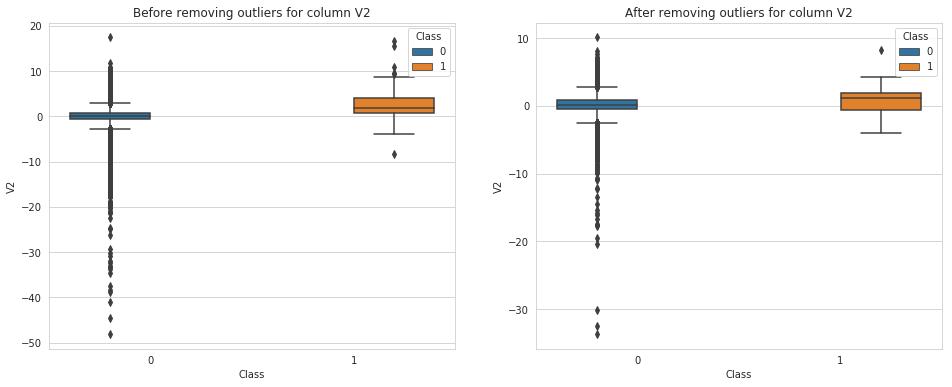

In [104]:
fig = plt.figure(figsize = (16,6))

plt.subplot(1, 2, 1)
plt.title("Before removing outliers for column V2")
ax = sns.boxplot(x="Class", y = "V2", data= FinalData2, hue = "Class")

plt.subplot(1, 2, 2)
plt.title("After removing outliers for column V2")
ax = sns.boxplot(x="Class", y = "V2", data= FinalData, hue = "Class")

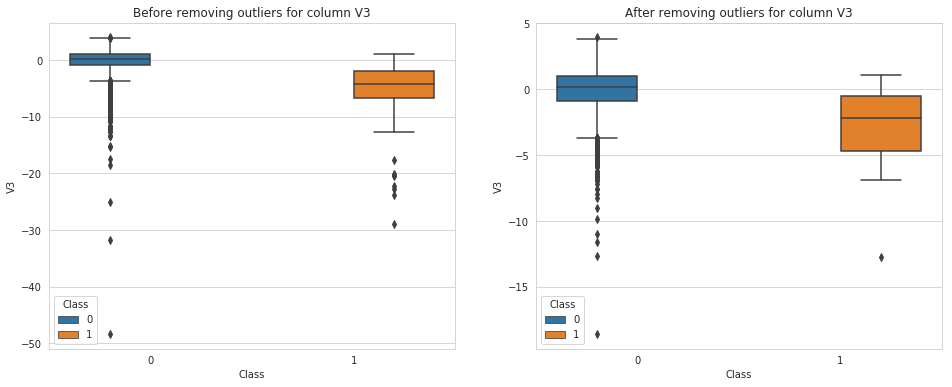

In [105]:
fig = plt.figure(figsize = (16,6))

plt.subplot(1, 2, 1)
plt.title("Before removing outliers for column V3")
ax = sns.boxplot(x="Class", y = "V3", data= FinalData2, hue = "Class")

plt.subplot(1, 2, 2)
plt.title("After removing outliers for column V3")
ax = sns.boxplot(x="Class", y = "V3", data= FinalData, hue = "Class")

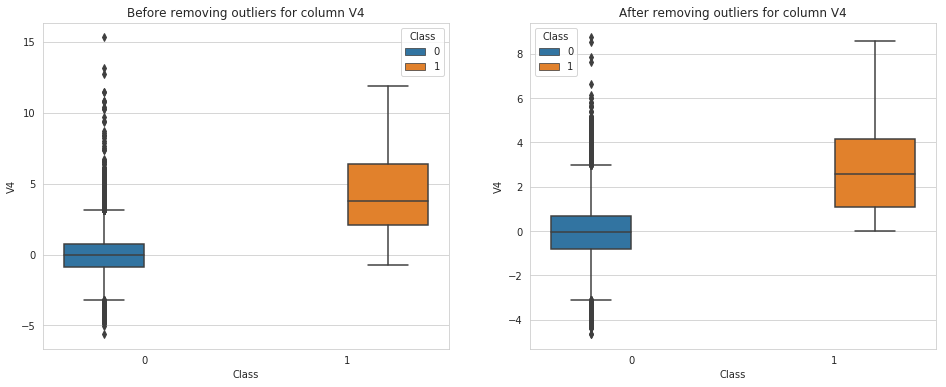

In [106]:
fig = plt.figure(figsize = (16,6))

plt.subplot(1, 2, 1)
plt.title("Before removing outliers for column V4")
ax = sns.boxplot(x="Class", y = "V4", data= FinalData2, hue = "Class")

plt.subplot(1, 2, 2)
plt.title("After removing outliers for column V4")
ax = sns.boxplot(x="Class", y = "V4", data= FinalData, hue = "Class")

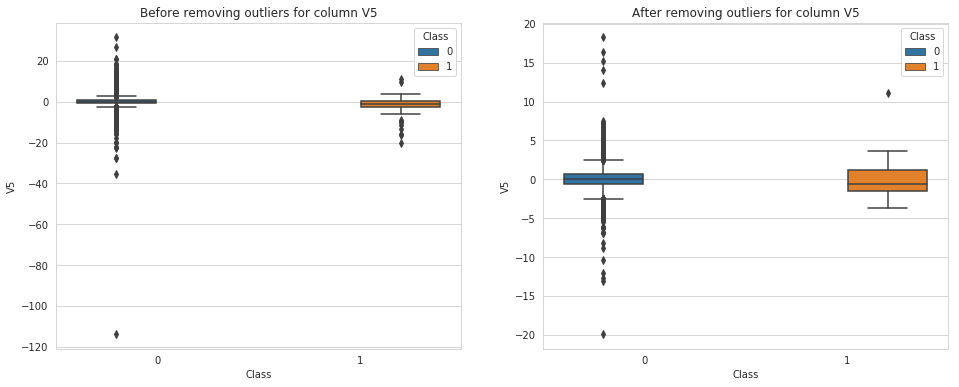

In [107]:
fig = plt.figure(figsize = (16,6))

plt.subplot(1, 2, 1)
plt.title("Before removing outliers for column V5")
ax = sns.boxplot(x="Class", y = "V5", data= FinalData2, hue = "Class")

plt.subplot(1, 2, 2)
plt.title("After removing outliers for column V5")
ax = sns.boxplot(x="Class", y = "V5", data= FinalData, hue = "Class")

It can easily be observed in all of the above boxplots corresponding to columns V1, V2, V3, V4, V5, that most of the outliers for points belongs to class 1 has been removed. Furthermore, many of the outliers for points belong to class 0 has also been removed. For example for class 0 in plot 1 for column V1 all of the outliers less than -17 have been removed. Similarly, for class 0 in plot 3 for column V3 all the outliers less than -15 have been removed. Similarly, for class 0 in plot 5 for column V5 all of the outliers greater than 8.5 have been removed.

In conclusion, for k = 5 more outliers have been removed as compared to k = 2 or 3. Therefore, k = 5 is the best value for number of neighbors.

# Task: Apply T-SNE on Credit Card Fraud Detection Dataset.

In [108]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

url = "creditcard.csv"

creditcard = pd.read_csv(url)

In [109]:
print(creditcard.head(5))

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...         V21       V22       V23       V24  \
0  0.098698  0.363787  ...   -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425  ...   -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  ...    0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024  ...   -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  ...   -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28  Amount  Class  
0  0.128539 -0.189115

In [111]:

print(creditcard.shape)


(284807, 31)


In [112]:
data = creditcard.drop("Class", axis = 1)
c = creditcard["Class"]

In [113]:
print("the shape of data = ", data.shape)
print("the shape of class = ", c.shape)


the shape of data =  (284807, 30)
the shape of class =  (284807,)


In [114]:
# Data-preprocessing: Standardizing the data
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)
print(type(standardized_data))
#here we have just standardized our data to col-std so that the mean = 0 and standard-deviation = 1.


(284807, 30)
<class 'numpy.ndarray'>


In [124]:
m = np.mean(standardized_data)
sd = np.std(standardized_data)
print(m)
print(sd)

-1.2108202200867089e-17
0.9999999999999997


In [130]:
from sklearn.manifold import TSNE
data_25k = standardized_data[0:25000]
labels_25k = c[0:25000]

model = TSNE(n_components=2, random_state=0, perplexity=50, n_iter=1000)

tsne_data = model.fit_transform(data_25k)

# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_25k)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dimension1", "Dimension2", "Class"))

# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue="Class", size=8).map(plt.scatter, 'Dimension1', 'Dimension2').add_legend()
plt.show()

IndexError: invalid index to scalar variable.

In [131]:
model = TSNE(n_components=2, random_state=0, perplexity=50, n_iter=3500)

tsne_data = model.fit_transform(data_25k)

# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_25k)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dimension1", "Dimension2", "Class"))

# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue="Class", size=8).map(plt.scatter, 'Dimension1', 'Dimension2').add_legend()
plt.show()


KeyboardInterrupt: 

In [ ]:
model = TSNE(n_components=2, random_state=0, perplexity=100, n_iter=2000)

tsne_data = model.fit_transform(data_25k)

# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_25k)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dimension1", "Dimension2", "Class"))

# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue="Class", size=8).map(plt.scatter, 'Dimension1', 'Dimension2').add_legend()
plt.show()

In [ ]:
model = TSNE(n_components=2, random_state=0, perplexity=500, n_iter=1200)

tsne_data = model.fit_transform(data_25k)

# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_25k)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dimension1", "Dimension2", "Class"))

# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue="Class", size=8).map(plt.scatter, 'Dimension1', 'Dimension2').add_legend()
plt.show()

In [ ]:
model = TSNE(n_components=2, random_state=0, perplexity=10, n_iter=1200)

tsne_data = model.fit_transform(data_25k)

# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_25k)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dimension1", "Dimension2", "Class"))

# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue="Class", size=8).map(plt.scatter, 'Dimension1', 'Dimension2').add_legend()
plt.show()